In [89]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

%matplotlib inline

In [90]:
columns = [
    "Возраст (лет)",
    "Количество иждивенцев", 
    "Доход (руб./мес.)", 
    "Срок проживания в регионе (лет)", 
    "Оценка автомобиля заемщика (USD)", 
    "Размер кредита (тыс. руб.)"
    ]

data = pd.read_excel('data/23MAG_HW_1_v2.xls', header=None, names=columns)

In [91]:
data

,Возраст (лет),Количество иждивенцев,Доход (руб./мес.),Срок проживания в регионе (лет),Оценка автомобиля заемщика (USD),Размер кредита (тыс. руб.)
0,51.0,3.0,17600.0,17.0,20000.0,190000.0
1,NaN,2.0,12900.0,10.0,13000.0,127000.0
2,51.0,3.0,7100.0,17.0,NaN,82000.0
3,44.0,2.0,16000.0,13.0,17000.0,165000.0
4,49.0,3.0,14900.0,16.0,17000.0,159000.0
5,21.0,3.0,8200.0,11.0,48000.0,250000.0
6,35.0,2.0,29400.0,6.0,29000.0,NaN
7,32.0,2.0,NaN,5.0,36000.0,365000.0
8,32.0,1.0,27000.0,NaN,26000.0,261000.0
9,NaN,2.0,29000.0,7.0,28000.0,287000.0


# Первичная обработка данных

## 1. Основные характеристики

Рассмотрим базовые характеристика данных

In [92]:
data.describe()

,Возраст (лет),Количество иждивенцев,Доход (руб./мес.),Срок проживания в регионе (лет),Оценка автомобиля заемщика (USD),Размер кредита (тыс. руб.)
count,39.000000,39.000000,39.000000,39.000000,38.000000,39.000000
mean,38.717949,2.000000,18658.974359,10.153846,21736.842105,196179.487179
std,8.888043,1.025978,9634.879562,4.944633,11324.892961,98518.465219
min,19.000000,0.000000,700.000000,1.000000,0.000000,3000.000000
25%,31.500000,1.000000,11900.000000,5.500000,16250.000000,149000.000000
50%,39.000000,2.000000,18700.000000,10.000000,22500.000000,200000.000000
75%,44.000000,3.000000,26200.000000,13.000000,27750.000000,262500.000000
max,56.000000,4.000000,38600.000000,20.000000,50000.000000,397000.000000


Видим, что среднее и медианные значения близки друг к другу, что говорит нам о симметричности распределения данных

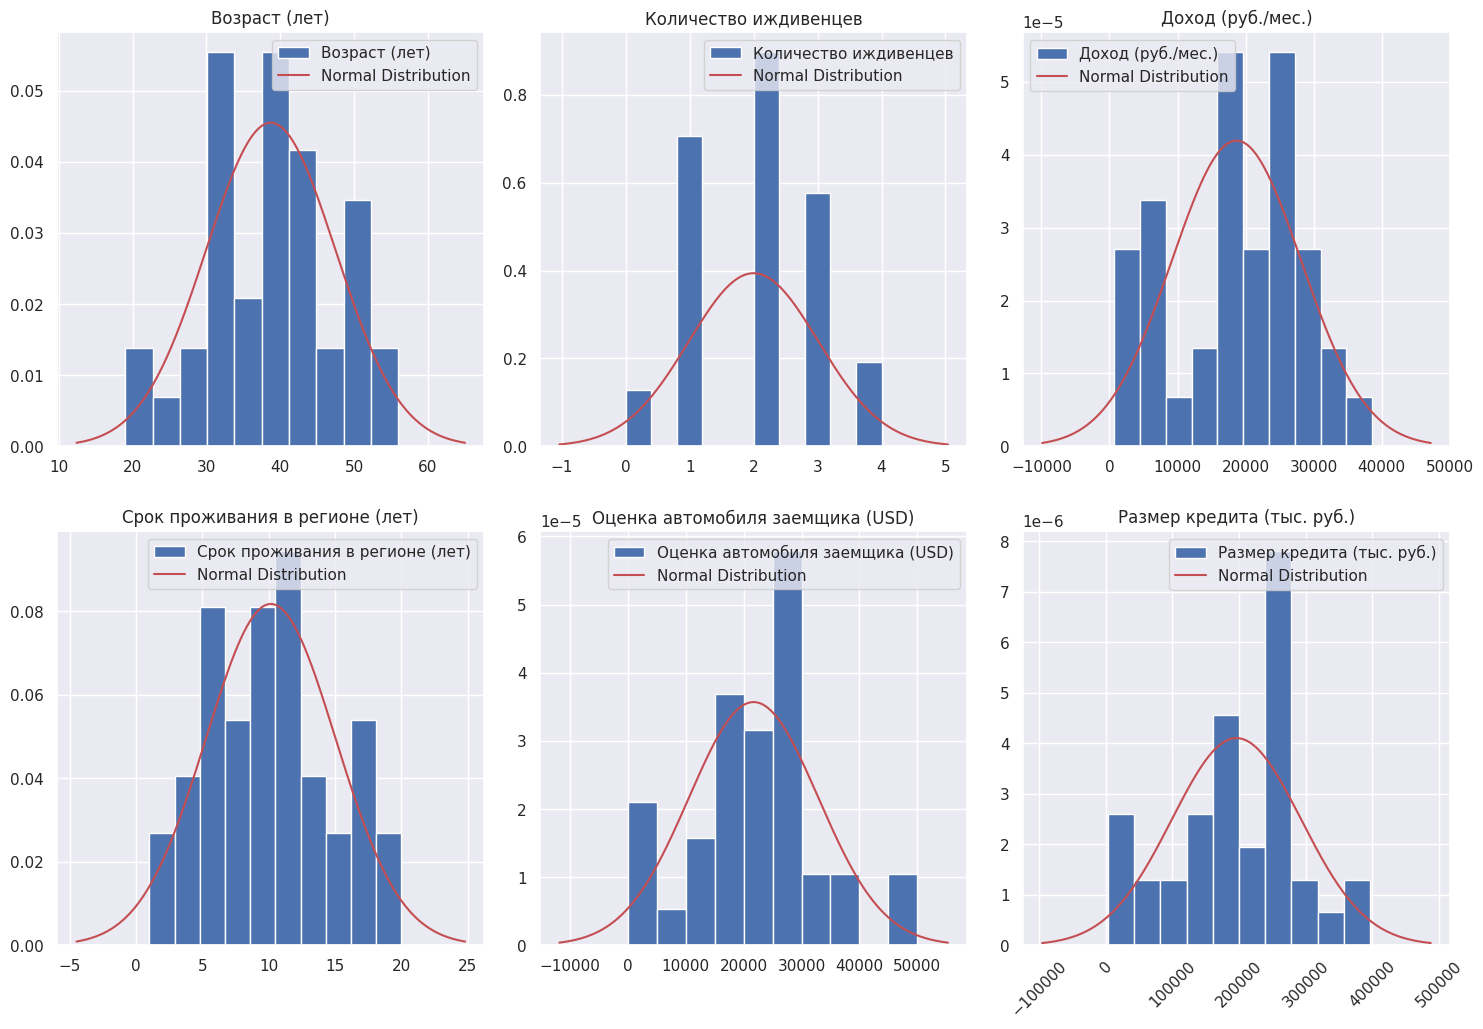

In [93]:
from scipy.stats import norm
sns.set()

num_columns = data.shape[1]

fig, axes = plt.subplots(2, 3, figsize=(15, 10)) 

for i in range(num_columns):
    column_data = data[data.columns[i]]

    col = i % 3
    row = i // 3

    axes[row, col].hist(column_data, density=True, color='b', label=data.columns[i])

    mu, sigma = np.mean(column_data), np.std(column_data)
    x = np.linspace(mu - 3 * sigma, mu + 3 * sigma, 500)
    axes[row, col].plot(x, norm.pdf(x, mu, sigma), 'r', label='Normal Distribution')

    axes[row, col].set_title(f'{data.columns[i]}')
    axes[row, col].legend()

plt.tight_layout()
plt.xticks(rotation=45)
plt.show()

Судя по графикам, распределения данных близки к нормальным. Для проверки гипотезы проведем тесты на нормальность распределения. Для проверки возьмем одну из наиболее популярных процедур проверки - тест Шапиро-Уилка

In [94]:
from scipy import stats

normal_columns = []

for i in data.columns:
    statistic, p_value = stats.shapiro(data[i].dropna())

    alpha = 0.05

    if p_value < alpha:
        print(f"{i}: is not normal")
    else:
        print(f"{i}: is normal")
        normal_columns.append(i)

normal_columns

Возраст (лет): is normal
Количество иждивенцев: is not normal
Доход (руб./мес.): is normal
Срок проживания в регионе (лет): is normal
Оценка автомобиля заемщика (USD): is normal
Размер кредита (тыс. руб.): is normal


['Возраст (лет)',
 'Доход (руб./мес.)',
 'Срок проживания в регионе (лет)',
 'Оценка автомобиля заемщика (USD)',
 'Размер кредита (тыс. руб.)']

Единственным признаком не прошедшим тест на нормальность является "Количество иждевенцев". Объясняется это тем, что "Количество иждевенцев" - дискретный признак. Остальные признаки, согласно тесту, имеют нормальное распределение.

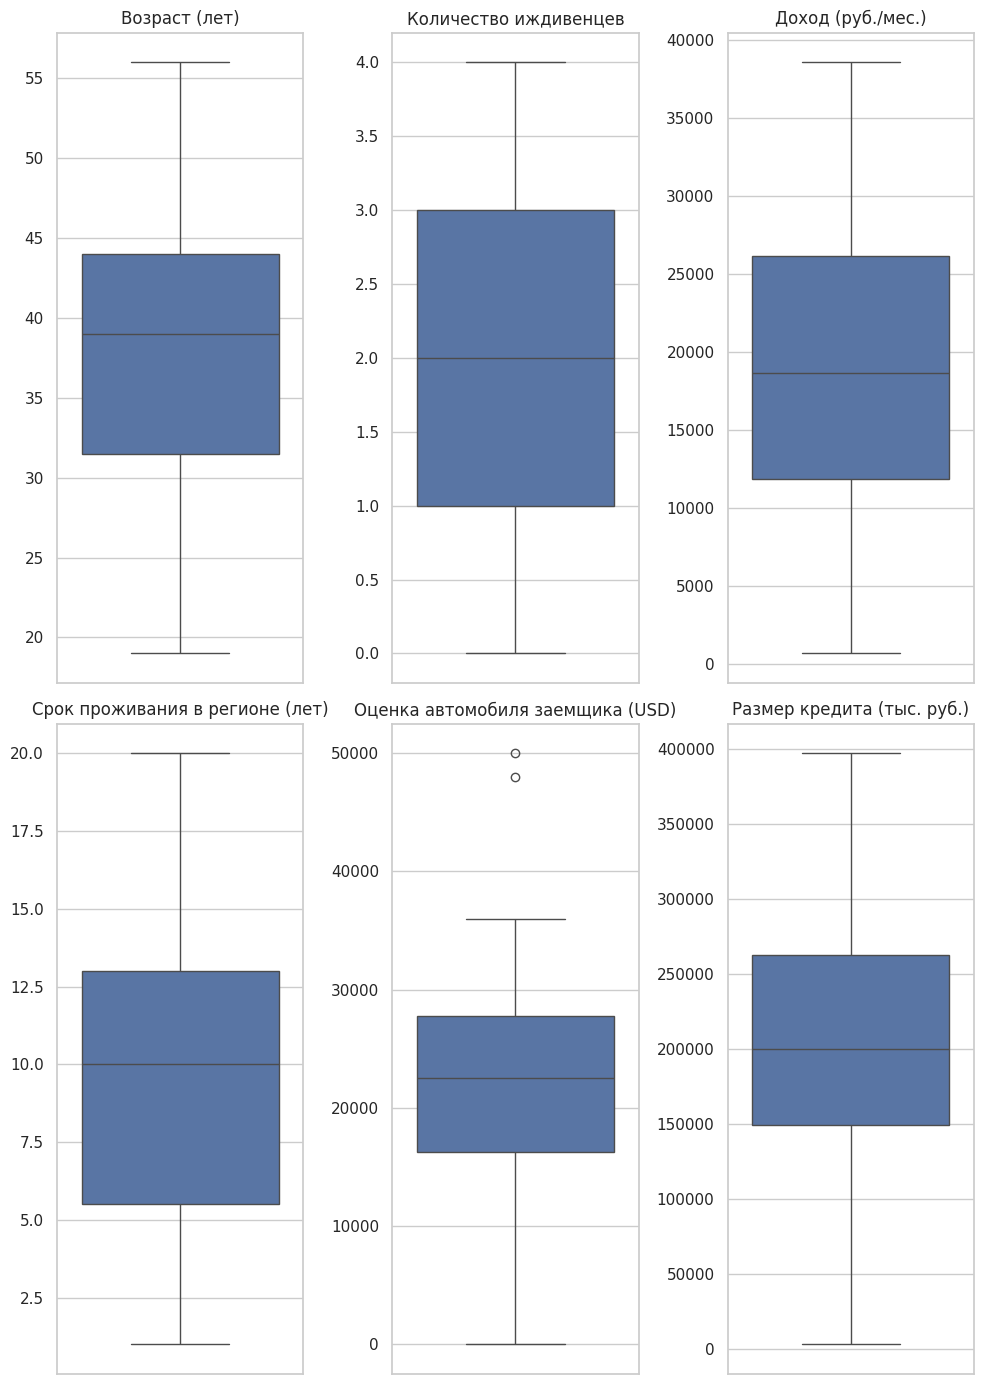

In [95]:
sns.set(style="whitegrid")
fig, axes = plt.subplots(2, 3, figsize=(10, 14))

for i, column in enumerate(data.columns):
    col = i % 3
    row = i // 3
    sns.boxplot(y=data[column], ax=axes[row, col]) 
    axes[row, col].set_title(column)
    axes[row, col].set_ylabel("")

plt.tight_layout()
plt.show(axes.any())

Легко заметить, что единственным признаком с выбросами является "Оценка автомобиля заемщика". Данный признак имеет 2 выброса.

## 2. Заполнение пропусков

In [96]:
linear_regression_columns = ['Возраст (лет)', 'Доход (руб./мес.)',
       'Срок проживания в регионе (лет)', 'Оценка автомобиля заемщика (USD)',
       'Размер кредита (тыс. руб.)']

Проверим есть ли строки, в которых пропущены более 1 значения

In [97]:
num_nans_in_rows = data.isna().sum(axis=1)

num_nans_in_rows.max()

1

In [98]:
data_copy = data.copy()

Наибольшее количество пустых значений в строках равно 1. Следовательно, мы можем обучать модели и заполнить недостающие значения предсказаниями модели. Если бы количество пустых значений в строках было более 1, то задача обучения модели и заполнения пропусков предсказаниями становится более трудной.

In [99]:
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.model_selection import train_test_split

filled_with_regressions = data.copy()
cleared_data = data.dropna(axis=0)

print("Mean absolute error:")
for i in filled_with_regressions.columns:
    missing = filled_with_regressions.loc[np.isnan(filled_with_regressions[i])]
    not_missing = cleared_data.loc[~np.isnan(filled_with_regressions[i])]

    X_train, X_test, y_train, y_test = train_test_split(not_missing.drop(i, axis=1), not_missing[i], test_size=0.25)

    if i in linear_regression_columns:
        model = LinearRegression()
    else:
        model = LogisticRegression(penalty='l2', max_iter=5000)

    model.fit(X_train, y_train)

    y_pred = model.predict(X_test)

    print(f'{i}: {mean_squared_error(y_test, y_pred)}')

    if len(missing) == 0:
        print("no missing values")
        continue
    
    predicted_values = model.predict(missing.drop(i, axis=1)).flatten()
  
    filled_with_regressions.loc[missing.index, i] = predicted_values


Mean absolute error:
Возраст (лет): 2.1978866591625934
Количество иждивенцев: 0.5
Доход (руб./мес.): 466936.87481063296
Срок проживания в регионе (лет): 0.6051457066690921
Оценка автомобиля заемщика (USD): 620394.746523508
Размер кредита (тыс. руб.): 468113185.7929175


Попробуем алгоритм MICE (Multiple Imputation by Chained Equation). Его суть заключается в запуске нескольких регрессий и заполнении пропусков усредненными полученными результатами.

In [100]:
from fancyimpute import IterativeImputer

mice_imputer = IterativeImputer()
filled_with_mice = mice_imputer.fit_transform(data_copy)

filled_with_mice = pd.DataFrame(filled_with_mice, columns=data.columns)
filled_with_mice.head()

,Возраст (лет),Количество иждивенцев,Доход (руб./мес.),Срок проживания в регионе (лет),Оценка автомобиля заемщика (USD),Размер кредита (тыс. руб.)
0,51.000000,3.0,17600.0,17.0,20000.00000,190000.0
1,39.163474,2.0,12900.0,10.0,13000.00000,127000.0
2,51.000000,3.0,7100.0,17.0,10413.01977,82000.0
3,44.000000,2.0,16000.0,13.0,17000.00000,165000.0
4,49.000000,3.0,14900.0,16.0,17000.00000,159000.0


In [101]:
data.head()

,Возраст (лет),Количество иждивенцев,Доход (руб./мес.),Срок проживания в регионе (лет),Оценка автомобиля заемщика (USD),Размер кредита (тыс. руб.)
0,51.0,3.0,17600.0,17.0,20000.0,190000.0
1,NaN,2.0,12900.0,10.0,13000.0,127000.0
2,51.0,3.0,7100.0,17.0,NaN,82000.0
3,44.0,2.0,16000.0,13.0,17000.0,165000.0
4,49.0,3.0,14900.0,16.0,17000.0,159000.0


Таким образом, мы использовали 2 алгоритма заполнения пропусков: с помощью комбинации регрессионных моделей (логистической и линейной для дискретных и непрерывных признаков соответственно) и MICE. Далее мы сравним эти способы и выберем более релевантный для наших.

## 3. Контроль выбросов

Для того, чтобы провести контроль выбросов используем IQR алгоритм, то есть возьмем значения, попадающие в интервал между квартилями 0.25 и 0.75 помноженные на константу 1.5.

In [102]:
def get_no_outliers(data: pd.DataFrame):
    Q1 = data.quantile(0.25)
    Q3 = data.quantile(0.75)
    IQR = Q3 - Q1

    lower_threshold = Q1 - 1.5 * IQR
    upper_threshold = Q3 + 1.5 * IQR

    return data[(data >= lower_threshold) & (data <= upper_threshold)].dropna()

In [103]:
mice_no_outliers = get_no_outliers(filled_with_mice)

print(f'Заполнение с помощью MICE\nКоличество объектов в очищенных данных => {len(mice_no_outliers)}\nКоличество объектов в исходных данных => {len(filled_with_mice)}')

Заполнение с помощью MICE
Количество объектов в очищенных данных => 40
Количество объектов в исходных данных => 42


In [104]:
regressions_no_outliers = get_no_outliers(filled_with_regressions)

print(f'Заполнение с помощью регрессий\nКоличество объектов в очищенных данных => {len(regressions_no_outliers)}\nКоличество объектов в исходных данных => {len(filled_with_regressions)}')

Заполнение с помощью регрессий
Количество объектов в очищенных данных => 40
Количество объектов в исходных данных => 42


В обоих случаях IQR отсеял 2 значение.

In [105]:
regressions_no_outliers.head()

,Возраст (лет),Количество иждивенцев,Доход (руб./мес.),Срок проживания в регионе (лет),Оценка автомобиля заемщика (USD),Размер кредита (тыс. руб.)
0,51.000000,3.0,17600.0,17.0,20000.000000,190000.0
1,38.874785,2.0,12900.0,10.0,13000.000000,127000.0
2,51.000000,3.0,7100.0,17.0,8272.621791,82000.0
3,44.000000,2.0,16000.0,13.0,17000.000000,165000.0
4,49.000000,3.0,14900.0,16.0,17000.000000,159000.0


In [106]:
mice_no_outliers.head()

,Возраст (лет),Количество иждивенцев,Доход (руб./мес.),Срок проживания в регионе (лет),Оценка автомобиля заемщика (USD),Размер кредита (тыс. руб.)
0,51.000000,3.0,17600.0,17.0,20000.00000,190000.0
1,39.163474,2.0,12900.0,10.0,13000.00000,127000.0
2,51.000000,3.0,7100.0,17.0,10413.01977,82000.0
3,44.000000,2.0,16000.0,13.0,17000.00000,165000.0
4,49.000000,3.0,14900.0,16.0,17000.00000,159000.0


# Снижение размерности

## 4. Центрирование данных и нормировка

In [107]:
def get_normalized_data(data: pd.DataFrame):
    mean = np.mean(data, axis=0)
    centered_data = data - mean

    euclidean_norms = np.linalg.norm(centered_data, axis=0, ord=2)
    normalized_data = centered_data / euclidean_norms
    return normalized_data

In [108]:
Z_mice = get_normalized_data(mice_no_outliers)

Z_mice.head()

,Возраст (лет),Количество иждивенцев,Доход (руб./мес.),Срок проживания в регионе (лет),Оценка автомобиля заемщика (USD),Размер кредита (тыс. руб.)
0,0.219580,0.156264,-0.038086,0.222589,-0.000537,-0.015814
1,-0.016817,0.004704,-0.113828,-0.002874,-0.111668,-0.116614
2,0.219580,0.156264,-0.207297,0.222589,-0.152738,-0.188614
3,0.079778,0.004704,-0.063871,0.093753,-0.048164,-0.055814
4,0.179637,0.156264,-0.081597,0.190380,-0.048164,-0.065414


In [109]:
np.linalg.norm(Z_mice, axis=0, ord=2)

array([1., 1., 1., 1., 1., 1.])

In [110]:
Z_regressions = get_normalized_data(regressions_no_outliers)

Z_regressions.head()

,Возраст (лет),Количество иждивенцев,Доход (руб./мес.),Срок проживания в регионе (лет),Оценка автомобиля заемщика (USD),Размер кредита (тыс. руб.)
0,0.219647,0.160654,-0.038021,0.222637,0.000389,-0.016030
1,-0.022436,0.011208,-0.113673,-0.002872,-0.111293,-0.116826
2,0.219647,0.160654,-0.207031,0.222637,-0.186717,-0.188824
3,0.079890,0.011208,-0.063775,0.093775,-0.047475,-0.056028
4,0.179716,0.160654,-0.081481,0.190421,-0.047475,-0.065628


In [111]:
np.linalg.norm(Z_regressions, axis=0, ord=2)

array([1., 1., 1., 1., 1., 1.])

Мы выполнили центрирование и нормировку данных такую, что полученные матрицы Z имеют евклидову норму каждого признака равную 1

## 5. Разложение SVD

In [112]:
U_mice, S_mice, V_mice = np.linalg.svd(Z_mice)

print("Матрица U_mice (левые сингулярные векторы):")
pd.DataFrame(U_mice).head()

Матрица U_mice (левые сингулярные векторы):


,0,1,2,3,4,5,6,7,8,9,...,30,31,32,33,34,35,36,37,38,39
0,-0.128311,0.159179,-0.222204,0.076138,-0.041130,-0.090736,0.141542,0.186982,0.037927,-0.114550,...,0.022611,0.009393,0.145457,0.107814,0.169982,0.020478,-0.305456,-0.332677,-0.020262,-0.396223
1,-0.084119,-0.072269,0.215866,0.048836,0.231011,0.070894,-0.332474,-0.040490,-0.102600,-0.125709,...,-0.019144,0.314986,0.024534,-0.132252,-0.070550,0.166003,-0.077001,-0.058264,0.080529,0.012141
2,-0.255141,0.060547,0.007785,-0.184468,0.526768,0.118386,0.133781,0.036437,0.144893,0.135186,...,0.039448,-0.105322,0.141330,-0.203467,0.171597,-0.154777,-0.072609,0.053983,-0.213889,0.208539
3,-0.081252,0.013777,-0.232511,0.138863,0.061697,-0.061899,-0.260155,-0.008855,0.142012,0.218461,...,0.298303,-0.016565,0.175676,0.024403,-0.124424,-0.142691,-0.049324,0.017699,-0.078860,0.060415
4,-0.148850,0.111807,-0.019424,0.120933,0.101849,0.075577,-0.048840,-0.202060,0.250737,-0.367845,...,0.029097,-0.012390,0.118484,-0.057108,0.163972,0.141344,-0.050200,0.008250,-0.101221,0.278823


In [113]:
U_reg, S_reg, V_reg = np.linalg.svd(Z_regressions)

print("Матрица U_reg (левые сингулярные векторы):")
pd.DataFrame(U_reg).head()

Матрица U_reg (левые сингулярные векторы):


,0,1,2,3,4,5,6,7,8,9,...,30,31,32,33,34,35,36,37,38,39
0,-0.125909,0.164079,-0.175816,0.069094,0.038172,0.021685,0.283216,0.124487,0.064863,-0.199629,...,0.034601,0.057281,0.141646,0.149508,0.168043,0.035216,-0.310507,-0.323869,-0.027730,-0.306482
1,-0.084778,-0.069856,0.220554,0.204435,0.096867,-0.182572,-0.364265,-0.004964,-0.127993,0.011592,...,-0.015373,0.239411,0.027737,-0.168904,-0.093384,0.249445,-0.096498,-0.069175,0.048643,-0.055311
2,-0.262903,0.060361,0.049871,-0.182787,-0.159163,0.151299,0.103756,0.180985,-0.000603,0.189275,...,0.048719,-0.109558,0.084460,-0.148656,0.054482,-0.171738,-0.041687,0.036617,-0.144755,-0.020393
3,-0.081735,0.017952,-0.178109,0.140424,0.045279,0.024203,0.131479,-0.116740,0.167851,0.248328,...,0.317771,0.022377,0.155233,0.115227,-0.134131,-0.103540,-0.083420,0.029403,-0.105408,0.207060
4,-0.147215,0.117019,0.000939,0.152960,0.074515,-0.168142,-0.306542,-0.090657,0.207492,0.348625,...,-0.045499,-0.151122,0.137745,-0.251566,0.250253,0.013009,-0.133153,-0.054486,-0.180122,0.173443


In [114]:
print("Сингулярные значения S_mice:")
pd.DataFrame(S_mice).T

Сингулярные значения S_mice:


,0,1,2,3,4,5
0,1.812827,1.632525,0.212561,0.04653,0.031604,0.013245


In [115]:
print("Сингулярные значения S_reg:")
pd.DataFrame(S_reg).T

Сингулярные значения S_reg:


,0,1,2,3,4,5
0,1.812591,1.628117,0.245492,0.047598,0.030746,0.016506


In [116]:
print("Матрица V_mice (правые сингулярные векторы):")
pd.DataFrame(V_mice)

Матрица V_mice (правые сингулярные векторы):


,0,1,2,3,4,5
0,-0.372837,-0.216486,0.490375,-0.407324,0.439151,0.463565
1,0.448056,0.553597,0.280175,0.409214,0.369865,0.331696
2,-0.395614,0.803883,-0.064784,-0.404075,-0.147582,-0.089481
3,-0.694279,0.013112,0.059352,0.707524,-0.081568,0.083900
4,-0.147255,0.010661,-0.514491,0.024756,0.790589,-0.296409
5,-0.004519,0.012266,0.639229,0.046394,0.129930,-0.756427


In [117]:
print("Матрица V_reg (правые сингулярные векторы):")
pd.DataFrame(V_reg)

Матрица V_reg (правые сингулярные векторы):


,0,1,2,3,4,5
0,-0.366040,-0.201659,0.494609,-0.401087,0.448451,0.467688
1,0.455465,0.558722,0.271423,0.416532,0.356827,0.325403
2,-0.381774,0.803427,-0.089792,-0.418407,-0.133707,-0.088032
3,-0.690475,0.025235,-0.202086,0.641388,0.264598,-0.019470
4,0.188996,-0.019414,-0.560773,-0.278944,0.727865,-0.204547
5,0.018448,-0.025604,-0.564202,-0.037125,-0.232140,0.790831


## 6. Исследование скрытых факторов

In [118]:
def hidden_factors(Z:pd.DataFrame, S:pd.DataFrame, U:pd.DataFrame, V:pd.DataFrame):
    total_variance = np.sum(S**2)
    explained_variance = np.cumsum(S**2)
    threshold = 0.95 * total_variance

    num_components = np.argmax(explained_variance >= threshold) + 1

    print(f"Число главных факторов, объясняющих {threshold/total_variance:.0%} дисперсии: {num_components}")

    Zk = np.dot(U[:, :num_components], np.dot(np.diag(S[:num_components]), V[:num_components, :]))

    spectral_norm_error = np.linalg.norm(Z - Zk, 'fro') / np.linalg.norm(Z, ord=2)
    frobenius_error = np.linalg.norm(Z - Zk, 'fro')**2/np.linalg.norm(Z, 'fro')**2

    print(f"Число главных факторов: {num_components}")
    print(f"Спектральная норма погрешности аппроксимации: {spectral_norm_error}")
    print(f"Норма Фробениуса погрешности аппроксимации: {frobenius_error}")

In [119]:
hidden_factors(Z_regressions, S_reg, U_reg, V_reg)

Число главных факторов, объясняющих 95% дисперсии: 2
Число главных факторов: 2
Спектральная норма погрешности аппроксимации: 0.13929606495276775
Норма Фробениуса погрешности аппроксимации: 0.01062493286442918


In [120]:
hidden_factors(Z_mice, S_mice, U_mice, V_mice)

Число главных факторов, объясняющих 95% дисперсии: 2
Число главных факторов: 2
Спектральная норма погрешности аппроксимации: 0.12150972824523228
Норма Фробениуса погрешности аппроксимации: 0.008086928162196754


In [121]:
print(f'Квадраты сингулярных чисел при заполении алгоритмом MICE')
pd.DataFrame([i**2 for i in S_mice]).T

Квадраты сингулярных чисел при заполении алгоритмом MICE


,0,1,2,3,4,5
0,3.286342,2.665137,0.045182,0.002165,0.000999,0.000175


In [122]:
print(f'Квадраты сингулярных чисел при заполении регрессиями')
pd.DataFrame([i**2 for i in S_reg]).T

Квадраты сингулярных чисел при заполении регрессиями


,0,1,2,3,4,5
0,3.285487,2.650763,0.060266,0.002266,0.000945,0.000272


In [123]:
def print_percentage_contribution(S):
    squared_values = S**2
    sum = np.sum(squared_values)
    for i, v in enumerate(squared_values / sum):
        print(f"{i + 1}: {np.round(v * 100, 3)}")

In [124]:
print_percentage_contribution(S_reg)

1: 54.758
2: 44.179
3: 1.004
4: 0.038
5: 0.016
6: 0.005


In [125]:
print_percentage_contribution(S_mice)

1: 54.772
2: 44.419
3: 0.753
4: 0.036
5: 0.017
6: 0.003


При выполнении работы были проведены множественные тестирования и в большинстве случаев спектральная норма матрицы Z,
полученной из данных, востанновленных с помощью регрессии имели лучшие показатели, то есть меньшее количество главных факторов (всегда выдавало количество факторов k=2, когда с MICE алгоритмом периодически k=3). \
Поэтому для дальнейшей работы был выбран более стабильный алгоритм заполнения пропусков - с помощью регрессии.

## 7. Снижение размерности. Карта клиенов.

In [126]:
def print_scatter(data: pd.DataFrame):
    sns.scatterplot(x=data[:,0], y=data[:,1])
    plt.title('Карта клиентов (k=2)')
    plt.xlabel('Признак 1')
    plt.ylabel('Признак 2')
    plt.show()

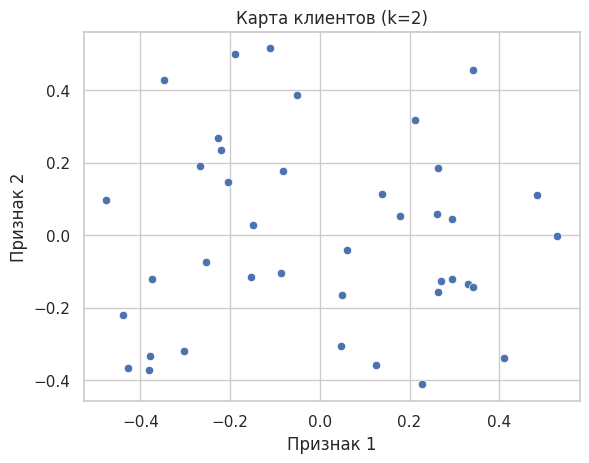

,0,1,2,3,4,5,6,7,8,9,...,30,31,32,33,34,35,36,37,38,39
0,-0.228221,-0.153667,-0.476536,-0.148153,-0.266841,0.294897,0.483471,0.295098,0.261415,0.341367,...,0.177735,-0.303778,0.331030,-0.087618,0.341427,-0.379315,-0.347706,-0.189367,-0.374229,-0.111012
1,0.267140,-0.113734,0.098275,0.029227,0.190520,0.045918,0.110085,-0.119645,0.058796,0.455645,...,0.053353,-0.317940,-0.135446,-0.103398,-0.142624,-0.332998,0.427996,0.499721,-0.119573,0.514692


In [127]:
k = 2

client_projections = np.dot(Z_regressions, V_reg.T[:, :k])
print_scatter(client_projections)
pd.DataFrame(client_projections).T

Судя по карте, повышенная концентрация клиентов во 2-ой и 4-ой четвертях. При этом не очевидно их разбиение на кластеры, то есть какой-либо ярко выраженных групп точек не выявленно. Единственное крупное скопление (5 клиентов) находится в 4 четверти.

# Снижение размерности. Интерпретация скрытых факторов.

## 8. Матрица коэффициентов разложения признаков $z^j$ по главным факторам.

In [128]:
V_k = V_reg[:, :k].T

print("Матрица коэффициентов разложения:")
pd.DataFrame(V_k, columns=data.columns)

Матрица коэффициентов разложения:


,Возраст (лет),Количество иждивенцев,Доход (руб./мес.),Срок проживания в регионе (лет),Оценка автомобиля заемщика (USD),Размер кредита (тыс. руб.)
0,-0.366040,0.455465,-0.381774,-0.690475,0.188996,0.018448
1,-0.201659,0.558722,0.803427,0.025235,-0.019414,-0.025604


Наибольшее влияние на 1 фактор имеют "Срок проживания в регионе (лет)" и "Количество иждивенцев". Также весомыми можно назвать "Возраст (лет)" и "Доход (руб./мес.)". \
В то же время "Доход (руб./мес.)" оказывает подавляющее влияние на фактор 2. Также легко заметить, что "Количество иждивенцев" и "Возраст (лет)" (по сравнению с остальными признаками) оказывают сильное влияние на 2-ой фактор.

## 9. Интерпретация

На оба фактора сильное влияние оказывает признак "Количество иждивенцев", однако для первого признака ключевыми являются временные признаки, такие как "Возраст (лет)" и "Срок проживания в регионе (лет)", а для второго - "Доход (руб./мес.)" и "Количество иждивенцев". \
Также выделяется факт, что на оба фактора почти не оказывает влияния признак "Размер кредита (тыс. руб)".

Можно предположить, что первый фактор отвечает за возможность одобрения услуги банком, в то время как второй признак может влиять на условия предоставляемого предложения, так как ключевыми параметрами являются "Доход (руб./мес.)" и "Количество иждивенцев".

# Снижение размерности. Метод MDS

## 10. Предложите способ вычисления расстояния между клиентами и вычислите матрицу расстояний. 

В данном пункте мы вычислим евклидово расстояние между клиентами, для измерения из "близости" (Косинусной близости)

In [129]:
from scipy.spatial.distance import cdist

euclidean_distances = cdist(client_projections, client_projections, 'euclidean')

normalized_projections = client_projections / np.linalg.norm(client_projections, axis=1, keepdims=True)
cosine_distances = cdist(normalized_projections, normalized_projections, 'cosine')

In [130]:
pd.DataFrame(cosine_distances).head()

,0,1,2,3,4,5,6,7,8,9,...,30,31,32,33,34,35,36,37,38,39
0,0.000000,0.930220,0.210270,0.215573,0.029561,1.524839,1.464538,1.887633,1.466882,0.780973,...,1.403528,1.101007,1.889100,1.160135,1.892424,1.013472,0.000306,0.058846,0.612675,0.119823
1,0.930220,0.000000,0.332933,0.326553,0.691524,1.885750,1.915810,1.521368,1.914743,1.958057,...,1.940895,0.014588,1.518639,0.026485,1.512371,0.003468,0.954912,1.271480,0.053277,1.412070
2,0.210270,0.332933,0.000000,0.000037,0.085560,1.936654,1.910106,1.983518,1.911201,1.425587,...,1.879969,0.469451,1.982935,0.520925,1.981563,0.397241,0.225683,0.464076,0.128548,0.596071
3,0.215573,0.326553,0.000037,0.000000,0.089073,1.939631,1.913635,1.981927,1.914709,1.433351,...,1.884021,0.462183,1.981317,0.513396,1.979884,0.390403,0.231152,0.471354,0.124363,0.603951
4,0.029561,0.691524,0.085560,0.089073,0.000000,1.714759,1.664531,1.972546,1.666509,1.022935,...,1.612424,0.857908,1.973285,0.917168,1.974938,0.771748,0.035827,0.168237,0.401616,0.260397


## 11. Проверьте, можно ли клиентов банка поместить в евклидово пространство размерности 2 с сохранением расстояний между клиентами.

In [131]:
from sklearn.manifold import MDS

mds = MDS(n_components=2, dissimilarity='precomputed', normalized_stress=False)

client_embeddings = mds.fit_transform(euclidean_distances)

In [132]:
pd.DataFrame(client_embeddings).T

,0,1,2,3,4,5,6,7,8,9,...,30,31,32,33,34,35,36,37,38,39
0,0.271685,-0.110196,0.105614,0.032520,0.195374,0.041506,0.100680,-0.124213,0.055122,0.446156,...,0.051414,-0.311508,-0.140912,-0.100934,-0.148378,-0.324809,0.435948,0.495231,-0.112969,0.516790
1,0.222056,0.155345,0.474740,0.147149,0.262798,-0.295829,-0.485752,-0.293074,-0.262628,-0.354621,...,-0.178997,0.309524,-0.328625,0.089062,-0.338849,0.385961,0.338041,0.202257,0.376119,0.103219


In [133]:
mds.stress_

0.012965043840665342

## 12. Используйте любой из алгоритмов MDS для размещения объектов в евклидовом пространстве размерности 2 Оцените погрешность такого размещения. Постройте карту клиентов. Сравните с картой клиентов из п.7 и сделайте выводы.

In [134]:
from sklearn.metrics import mean_squared_error

original_distances = euclidean_distances 
reconstructed_distances = np.sqrt(np.sum((client_embeddings[:, np.newaxis, :] - client_embeddings) ** 2, axis=2))
error = mean_squared_error(original_distances, reconstructed_distances)

print("Погрешность размещения:", error)

Погрешность размещения: 9.158126063084175e-06


In [135]:
pd.DataFrame(reconstructed_distances).head()

,0,1,2,3,4,5,6,7,8,9,...,30,31,32,33,34,35,36,37,38,39
0,0.000000,0.387664,0.302372,0.250622,0.086506,0.566734,0.728173,0.649688,0.530866,0.602492,...,0.457562,0.589716,0.688103,0.395642,0.700762,0.618604,0.201083,0.224421,0.414361,0.272394
1,0.387664,0.000000,0.385470,0.142950,0.323912,0.475995,0.674889,0.448638,0.449479,0.754714,...,0.371352,0.253570,0.484944,0.066927,0.495667,0.315028,0.575891,0.607241,0.220791,0.629148
2,0.302372,0.385470,0.000000,0.335647,0.230167,0.773231,0.960505,0.801473,0.739095,0.896554,...,0.655980,0.448651,0.840340,0.437504,0.852314,0.439484,0.357501,0.475445,0.239802,0.554160
3,0.250622,0.142950,0.335647,0.000000,0.199740,0.443069,0.636561,0.467291,0.410399,0.650283,...,0.326693,0.380422,0.506398,0.145547,0.518573,0.429785,0.446311,0.465981,0.271283,0.486258
4,0.086506,0.323912,0.230167,0.199740,0.000000,0.579429,0.754516,0.641194,0.543822,0.666406,...,0.464658,0.509031,0.680345,0.343486,0.692924,0.534565,0.252066,0.305907,0.328508,0.358850


Карта клиентов построенная с MDS


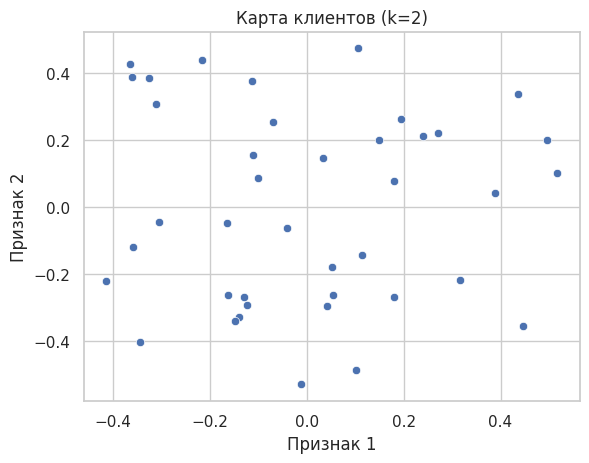

Карта клиентов построенная через перемножение Z и V


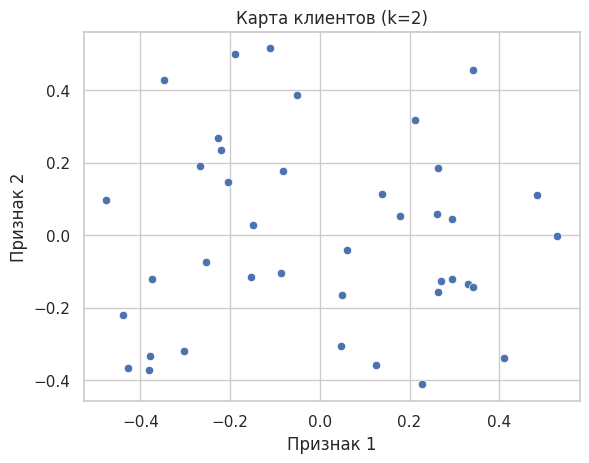

In [136]:
print('Карта клиентов построенная с MDS')
print_scatter(client_embeddings)
print('Карта клиентов построенная через перемножение Z и V')
print_scatter(client_projections)

Мы поместили клиентов в евклидово просранство размерности 2, используя MDS алгоритм, а также построили карты распределений клиентов банка. Сравнивая карту, полученную с использованием MDS, с картой, полученной в пунте 7, можно прийти к выводу, что они идентичны с точностью до поворота.